# METHODOLOGY AND EXPERIMENTATION CPI FORECASTING

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### Read File 

In [3]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
data.head()


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2003-01-01,102.0,101.6,102.1,100.1,96.6,105.5,108.4,100.5,99.3,106.8,101.5,101.5,108.3,101.9,102.1
2003-02-01,102.8,101.5,102.5,100.6,98.7,107.1,116.1,100.8,100.6,108.1,102.1,102.0,113.0,103.0,102.6
2003-03-01,103.1,101.7,103.2,100.6,100.3,107.6,117.2,100.5,100.3,108.3,102.3,102.2,115.3,103.6,102.7
2003-04-01,102.4,101.8,102.3,100.7,98.7,105.4,106.7,101.2,100.0,108.9,102.3,102.2,106.0,101.9,102.9
2003-05-01,102.5,102.1,102.9,100.6,98.3,104.0,99.3,101.4,100.7,110.2,102.5,102.4,103.7,101.8,103.2


#### Get Basic summary stastistics and information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2003-01-01 to 2023-04-01
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All-items                             244 non-null    float64
 1   Food                                  244 non-null    float64
 2   Shelter                               244 non-null    float64
 3   Household operations                  244 non-null    float64
 4   Clothing and footwear                 244 non-null    float64
 5   Transportation                        244 non-null    float64
 6   Gasoline                              244 non-null    float64
 7   Health and personal care              244 non-null    float64
 8   Recreation & education                244 non-null    float64
 9   Alcohol, tobacco & cannabis           244 non-null    float64
 10  All-items excluding food and energy   244 non-null    float64
 11  

In [5]:
data.columns

Index(['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services '],
      dtype='object')

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All-items,244.0,123.229508,13.362860,102.0,112.175,122.70,133.000,156.4
Food,244.0,132.002459,20.085299,100.7,112.600,131.80,144.700,183.1
Shelter,244.0,129.881148,16.165007,102.1,119.500,127.95,140.075,169.9
Household operations,244.0,114.036885,9.665732,100.1,104.000,114.05,122.725,133.7
Clothing and footwear,244.0,94.535246,2.662912,87.9,92.775,94.65,96.225,100.8
Transportation,244.0,128.072541,15.869033,103.7,116.700,127.35,137.125,176.2
Gasoline,244.0,161.768852,33.503064,99.3,142.525,157.40,183.350,299.4
Health and personal care,244.0,117.973361,10.583401,100.5,107.900,118.40,125.600,145.7
Recreation & education,244.0,108.413115,7.160660,99.1,102.075,106.40,114.500,127.1
"Alcohol, tobacco & cannabis",244.0,144.764754,21.909026,106.8,126.600,139.60,166.475,189.4


In [7]:
#checking for missing values
data.isnull().sum()

All-items                               0
Food                                    0
Shelter                                 0
Household operations                    0
Clothing and footwear                   0
Transportation                          0
Gasoline                                0
Health and personal care                0
Recreation & education                  0
Alcohol, tobacco & cannabis             0
All-items excluding food and energy     0
All-items excluding energy              0
Energy                                  0
Goods                                   0
Services                                0
dtype: int64

# PROPOSED MODEL 

### RNN Encoder Decoder Single Head Attention Model

In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Embedding, Flatten, Activation, Concatenate, Dot
from tensorflow.keras.models import Model

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Define the model architecture
encoder_inputs = Input(shape=(None, 1))
encoder_lstm = LSTM(180, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(180, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Attention mechanism
attention = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context, decoder_outputs])

output = TimeDistributed(Dense(1, activation='linear'))(decoder_combined_context)

model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='mse')

# Train the model with teacher forcing
encoder_input_train = train_data.values[:-1, :, np.newaxis]
decoder_input_train = train_data.values[1:, :, np.newaxis]
decoder_output_train = train_data.values[1:, :, np.newaxis]

encoder_input_val = val_data.values[:-1, :, np.newaxis]
decoder_input_val = val_data.values[1:, :, np.newaxis]
decoder_output_val = val_data.values[1:, :, np.newaxis]

model.fit(
    [encoder_input_train, decoder_input_train],
    decoder_output_train,
    validation_data=([encoder_input_val, decoder_input_val], decoder_output_val),
    epochs=500,
    batch_size=4
)

# Evaluate the model on the test set
encoder_input_test = test_data.values[:-1, :, np.newaxis]
decoder_input_test = test_data.values[1:, :, np.newaxis]
decoder_output_test = test_data.values[1:, :, np.newaxis]

preds = model.predict([encoder_input_test, decoder_input_test])
predictions = preds.squeeze()
test_values = decoder_output_test.squeeze()

mae = mean_absolute_error(test_values, predictions)
smape = 100 * np.mean(2 * np.abs(predictions - test_values) / (np.abs(predictions) + np.abs(test_values)))
rmse = np.sqrt(mean_squared_error(test_values, predictions))
r2 = r2_score(test_values, predictions)

print("MAE:", mae)
print("SMAPE:", smape)
print("RMSE:", rmse)
print("R2 Score:", r2)

Epoch 1/500
39/39 [==============================] - 5s 34ms/step - loss: 14321.7061 - val_loss: 11372.7305
Epoch 2/500
39/39 [==============================] - 1s 13ms/step - loss: 10078.9395 - val_loss: 7909.2417
Epoch 3/500
39/39 [==============================] - 1s 13ms/step - loss: 7252.8774 - val_loss: 5647.5142
Epoch 4/500
39/39 [==============================] - 1s 14ms/step - loss: 5200.1025 - val_loss: 3936.9927
Epoch 5/500
39/39 [==============================] - 1s 14ms/step - loss: 3707.9529 - val_loss: 2746.0015
Epoch 6/500
39/39 [==============================] - 0s 13ms/step - loss: 2660.1555 - val_loss: 1938.0135
Epoch 7/500
39/39 [==============================] - 1s 14ms/step - loss: 1942.2736 - val_loss: 1379.3206
Epoch 8/500
39/39 [==============================] - 1s 13ms/step - loss: 1435.3806 - val_loss: 987.4985
Epoch 9/500
39/39 [==============================] - 1s 13ms/step - loss: 1090.9141 - val_loss: 737.9234
Epoch 10/500
39/39 [=========================

39/39 [==============================] - 1s 17ms/step - loss: 13.3264 - val_loss: 0.9354
Epoch 81/500
39/39 [==============================] - 1s 15ms/step - loss: 13.2667 - val_loss: 2.7731
Epoch 82/500
39/39 [==============================] - 1s 16ms/step - loss: 13.6122 - val_loss: 0.8176
Epoch 83/500
39/39 [==============================] - 1s 15ms/step - loss: 12.4772 - val_loss: 0.6026
Epoch 84/500
39/39 [==============================] - 1s 14ms/step - loss: 12.0228 - val_loss: 0.7231
Epoch 85/500
39/39 [==============================] - 1s 15ms/step - loss: 11.8108 - val_loss: 0.4588
Epoch 86/500
39/39 [==============================] - 1s 15ms/step - loss: 11.3989 - val_loss: 0.3588
Epoch 87/500
39/39 [==============================] - 1s 15ms/step - loss: 11.0461 - val_loss: 0.4464
Epoch 88/500
39/39 [==============================] - 1s 15ms/step - loss: 10.8090 - val_loss: 0.2934
Epoch 89/500
39/39 [==============================] - 1s 15ms/step - loss: 10.5323 - val_loss: 

39/39 [==============================] - 1s 15ms/step - loss: 1.8846 - val_loss: 0.0667
Epoch 161/500
39/39 [==============================] - 1s 15ms/step - loss: 1.8077 - val_loss: 0.5111
Epoch 162/500
39/39 [==============================] - 1s 15ms/step - loss: 1.9522 - val_loss: 0.2800
Epoch 163/500
39/39 [==============================] - 1s 16ms/step - loss: 1.9375 - val_loss: 0.2300
Epoch 164/500
39/39 [==============================] - 1s 15ms/step - loss: 2.3110 - val_loss: 1.1453
Epoch 165/500
39/39 [==============================] - 1s 16ms/step - loss: 2.0324 - val_loss: 0.3549
Epoch 166/500
39/39 [==============================] - 1s 14ms/step - loss: 1.7372 - val_loss: 0.1566
Epoch 167/500
39/39 [==============================] - 1s 15ms/step - loss: 1.5485 - val_loss: 0.0954
Epoch 168/500
39/39 [==============================] - 1s 15ms/step - loss: 1.5457 - val_loss: 0.2498
Epoch 169/500
39/39 [==============================] - 1s 16ms/step - loss: 1.6970 - val_loss: 0

39/39 [==============================] - 1s 15ms/step - loss: 0.2709 - val_loss: 0.0436
Epoch 241/500
39/39 [==============================] - 1s 16ms/step - loss: 0.2667 - val_loss: 0.0517
Epoch 242/500
39/39 [==============================] - 1s 16ms/step - loss: 0.2952 - val_loss: 0.0492
Epoch 243/500
39/39 [==============================] - 1s 17ms/step - loss: 0.3298 - val_loss: 0.0751
Epoch 244/500
39/39 [==============================] - 1s 16ms/step - loss: 0.2697 - val_loss: 0.0273
Epoch 245/500
39/39 [==============================] - 1s 14ms/step - loss: 0.2569 - val_loss: 0.0693
Epoch 246/500
39/39 [==============================] - 1s 16ms/step - loss: 0.2377 - val_loss: 0.0228
Epoch 247/500
39/39 [==============================] - 1s 15ms/step - loss: 0.2532 - val_loss: 0.0993
Epoch 248/500
39/39 [==============================] - 1s 16ms/step - loss: 0.5640 - val_loss: 0.1258
Epoch 249/500
39/39 [==============================] - 1s 15ms/step - loss: 0.4105 - val_loss: 0

39/39 [==============================] - 1s 16ms/step - loss: 0.2002 - val_loss: 0.1190
Epoch 321/500
39/39 [==============================] - 1s 15ms/step - loss: 0.1939 - val_loss: 0.0562
Epoch 322/500
39/39 [==============================] - 1s 16ms/step - loss: 0.3344 - val_loss: 0.2736
Epoch 323/500
39/39 [==============================] - 1s 16ms/step - loss: 0.3667 - val_loss: 0.2148
Epoch 324/500
39/39 [==============================] - 1s 15ms/step - loss: 0.4772 - val_loss: 0.4301
Epoch 325/500
39/39 [==============================] - 1s 16ms/step - loss: 0.6775 - val_loss: 0.5393
Epoch 326/500
39/39 [==============================] - 1s 17ms/step - loss: 0.2337 - val_loss: 0.0361
Epoch 327/500
39/39 [==============================] - 1s 15ms/step - loss: 0.0687 - val_loss: 0.0390
Epoch 328/500
39/39 [==============================] - 1s 15ms/step - loss: 0.2027 - val_loss: 0.1192
Epoch 329/500
39/39 [==============================] - 1s 15ms/step - loss: 0.2037 - val_loss: 0

39/39 [==============================] - 1s 22ms/step - loss: 0.0923 - val_loss: 0.0930
Epoch 401/500
39/39 [==============================] - 1s 22ms/step - loss: 0.1561 - val_loss: 0.0362
Epoch 402/500
39/39 [==============================] - 1s 22ms/step - loss: 0.0534 - val_loss: 0.0247
Epoch 403/500
39/39 [==============================] - 1s 24ms/step - loss: 0.0194 - val_loss: 0.0116
Epoch 404/500
39/39 [==============================] - 1s 21ms/step - loss: 0.0377 - val_loss: 0.0873
Epoch 405/500
39/39 [==============================] - 1s 21ms/step - loss: 0.0253 - val_loss: 0.0135
Epoch 406/500
39/39 [==============================] - 1s 21ms/step - loss: 0.0109 - val_loss: 0.0074
Epoch 407/500
39/39 [==============================] - 1s 21ms/step - loss: 0.0124 - val_loss: 0.0084
Epoch 408/500
39/39 [==============================] - 1s 21ms/step - loss: 0.0112 - val_loss: 0.0063
Epoch 409/500
39/39 [==============================] - 1s 22ms/step - loss: 0.0077 - val_loss: 0

39/39 [==============================] - 1s 18ms/step - loss: 0.0397 - val_loss: 0.0385
Epoch 481/500
39/39 [==============================] - 1s 18ms/step - loss: 0.2238 - val_loss: 0.4316
Epoch 482/500
39/39 [==============================] - 1s 18ms/step - loss: 1.7911 - val_loss: 0.6201
Epoch 483/500
39/39 [==============================] - 1s 18ms/step - loss: 0.8537 - val_loss: 0.0928
Epoch 484/500
39/39 [==============================] - 1s 18ms/step - loss: 0.1708 - val_loss: 0.0589
Epoch 485/500
39/39 [==============================] - 1s 18ms/step - loss: 0.3595 - val_loss: 0.1157
Epoch 486/500
39/39 [==============================] - 1s 18ms/step - loss: 0.2789 - val_loss: 0.1928
Epoch 487/500
39/39 [==============================] - 1s 19ms/step - loss: 0.0797 - val_loss: 0.0430
Epoch 488/500
39/39 [==============================] - 1s 18ms/step - loss: 0.0335 - val_loss: 0.0105
Epoch 489/500
39/39 [==============================] - 1s 18ms/step - loss: 0.0586 - val_loss: 0

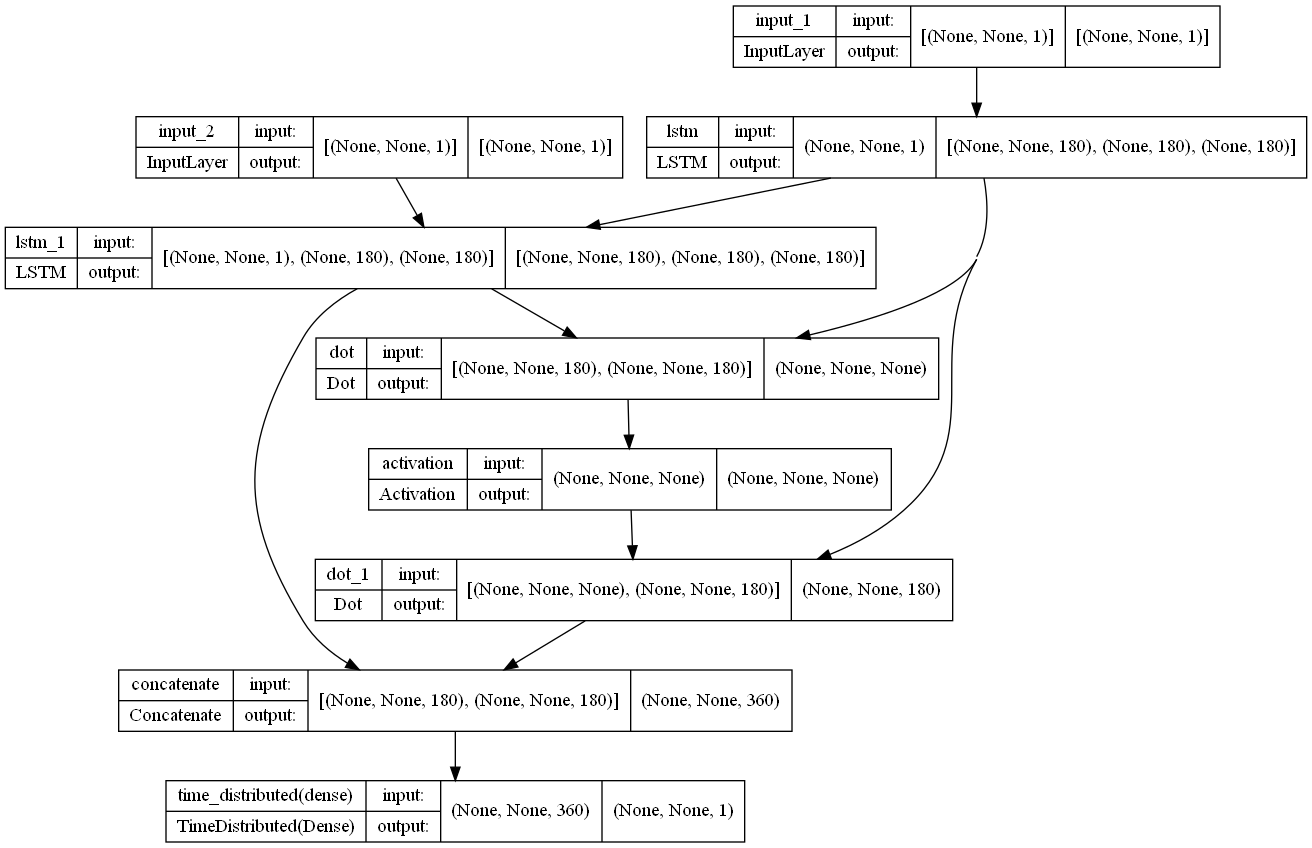

In [13]:
import tensorflow.keras.utils as keras_utils
import keras
import keras.utils
from keras import utils as np_utils
keras_utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)


#### Predicted Outputs 

In [14]:
result_df = pd.DataFrame(columns=['CPI Indicator', 'Actual', 'Predicted'])
for column in data.columns:
    # Prepare the input data for prediction
    input_data = test_data[[column]].values[:-1, :, np.newaxis]
    
    # Predict the values
    predicted_values = model.predict([input_data, input_data])
    
    # Get the actual values
    actual_values = test_data[[column]].values[1:]
    
    # Flatten the arrays for easier comparison
    predicted_values = predicted_values.flatten()
    actual_values = actual_values.flatten()
    
    # Create a DataFrame with the actual and predicted values for the column
    column_df = pd.DataFrame({'CPI Indicator': [column]*len(actual_values),
                              'Actual': actual_values,
                              'Predicted': predicted_values})
    
    # Append the column DataFrame to the result DataFrame
    result_df = result_df.append(column_df, ignore_index=True)
result_df

,CPI Indicator,Actual,Predicted
0,All-items,112.0,108.210037
1,All-items,120.7,108.319672
2,All-items,105.0,108.355293
3,All-items,103.1,108.155975
4,All-items,131.3,108.083618
...,...,...,...
715,Services,106.5,107.547981
716,Services,133.6,108.203903
717,Services,111.4,108.204788
718,Services,166.8,108.311157


# BASELINE COMPARED MODELS

In [10]:
#preprocessing 
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

In [11]:
#Split the data into train and test sets
train_data = data.iloc[:-12]  # Use all but the last 12 months for training
test_data = data.iloc[-12:]  # Use the last 12 months for testing


### Vector Auto Regression Model (VAR)

In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR
#Estimate the VAR model
model = VAR(train_data)
lag_order = model.select_order()
selected_order = lag_order.aic  # Extract the selected lag order value based on AIC
var_model = model.fit(selected_order)

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Component: All-items


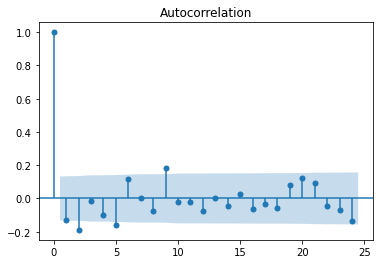

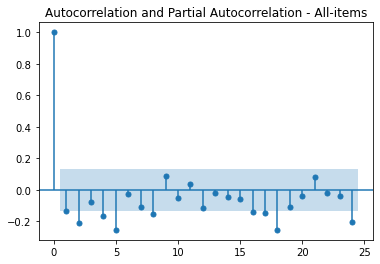

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Food 


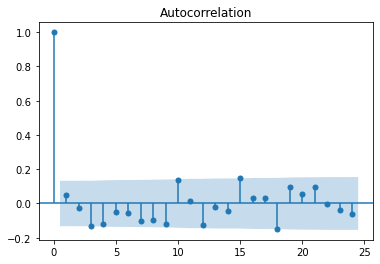

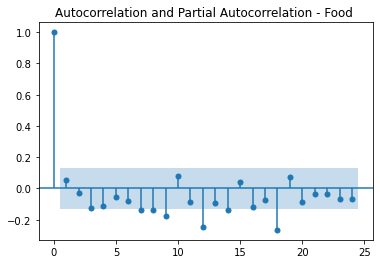

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Shelter


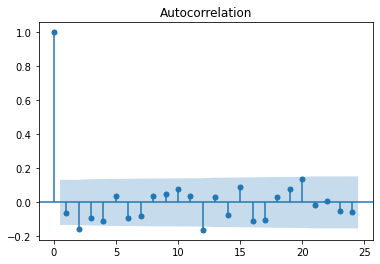

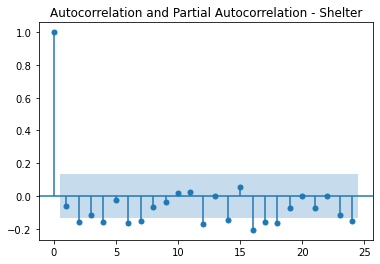

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Household operations


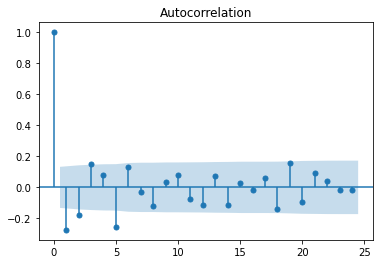

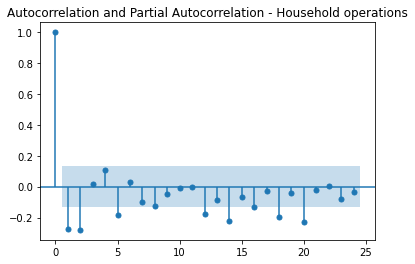

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Clothing and footwear


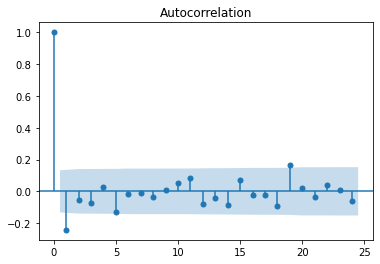

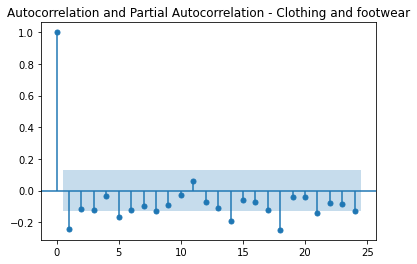

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Transportation


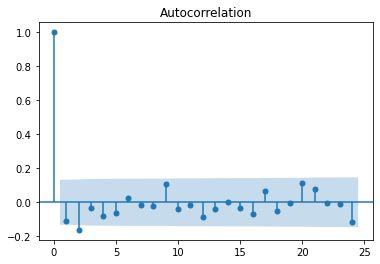

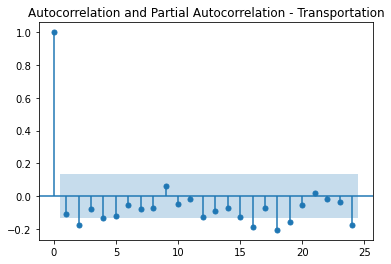

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Gasoline


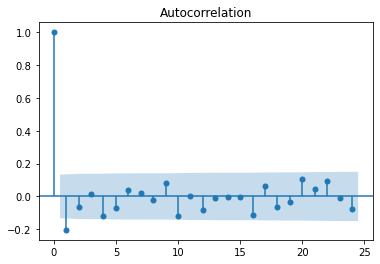

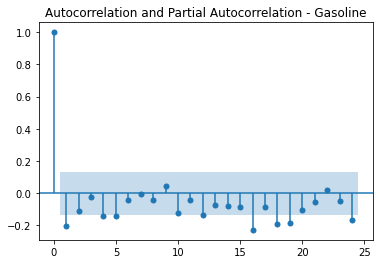

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Health and personal care


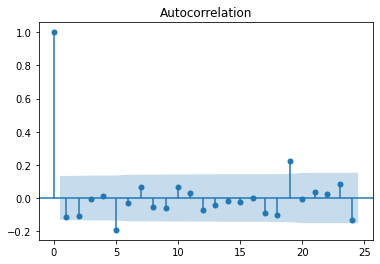

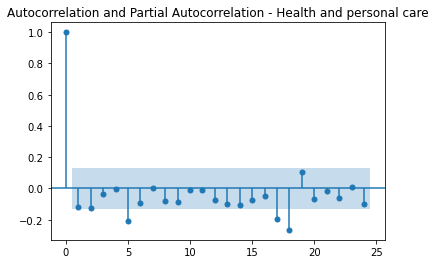

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Recreation & education 


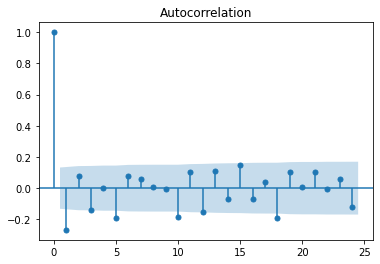

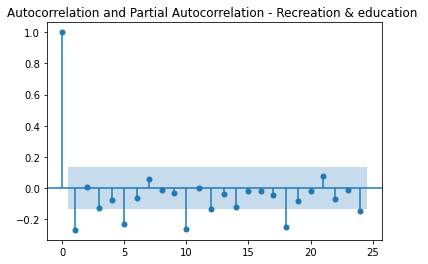

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Alcohol, tobacco & cannabis


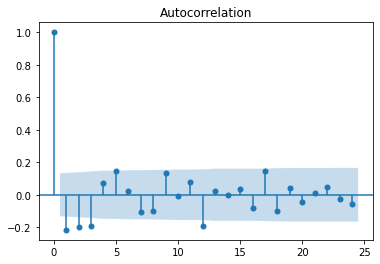

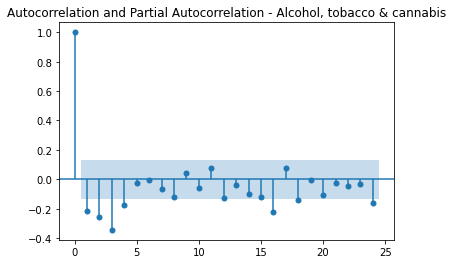

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: All-items excluding food and energy 


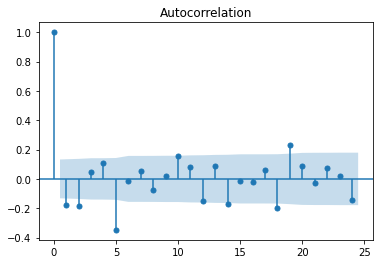

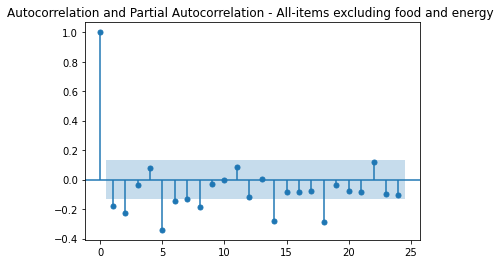

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: All-items excluding energy 


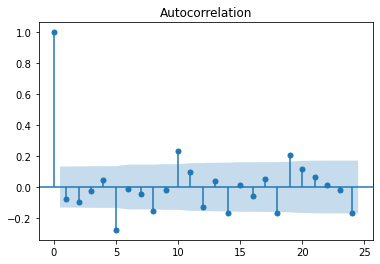

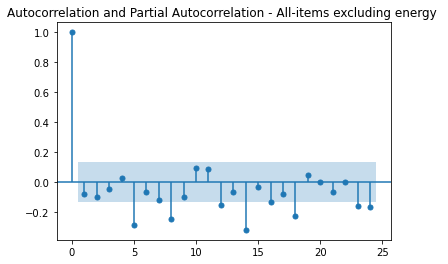

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Energy


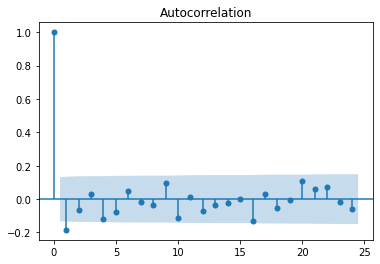

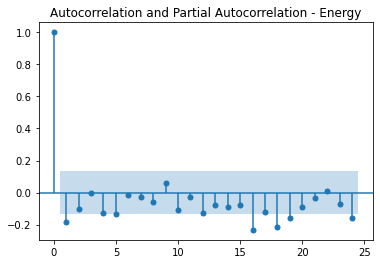

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Goods


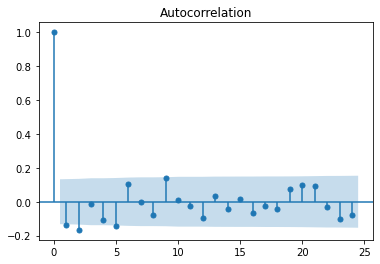

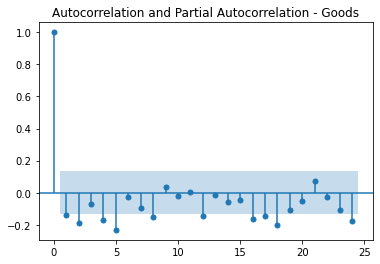

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


Component: Services 


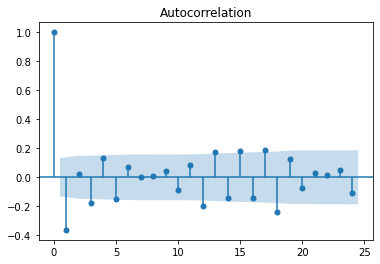

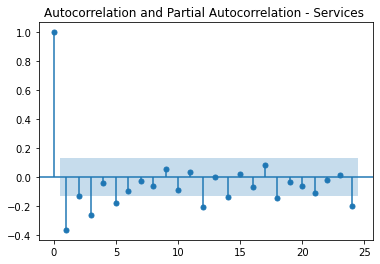

MAE: 16.720200204221555
SMAPE: 0.085434750618882
RMSE: 20.887966334441867
R2: 0.29712188181074706


C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [13]:
# Check model residuals
residuals = var_model.resid

mae_scores = []
smape_scores = []
rmse_scores = []
r2_scores = []

for component in cpi_components:
    print(f'Component: {component}')
    plot_acf(residuals[component])
    plot_pacf(residuals[component])
    plt.title(f'Autocorrelation and Partial Autocorrelation - {component}')
    plt.show()

    # Forecasting
    n_forecast_periods = len(test_data)  # Number of periods to forecast
    forecast = var_model.forecast(var_model.y, steps=n_forecast_periods)
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=cpi_components)

    r2_scores.append(r2_score(test_data[component], forecast_df[component]))
    mae_scores.append(mean_absolute_error(test_data[component], forecast_df[component]))

    def smape(y_true, y_pred):
        return 2 * abs(y_true - y_pred) / (abs(y_true) + abs(y_pred))

    smape_scores.append(smape(test_data[component], forecast_df[component]))
    rmse_scores.append(np.sqrt(mean_squared_error(test_data[component], forecast_df[component])))

var_r2 = r2_score(test_data.values.flatten(), forecast_df.values.flatten())
var_mae = np.mean(mae_scores)
var_smape = np.mean(smape_scores)
var_rmse = np.mean(rmse_scores)

print('MAE:', var_mae)
print('SMAPE:', var_smape)
print('RMSE:', var_rmse)
print('R2:', var_r2)


### ARIMA Model

In [42]:
from statsmodels.tsa.arima.model import ARIMA
# Load and preprocess the data
train_data = data.iloc[:-12]  # Use all but the last 12 months for training
test_data = data.iloc[-12:]
#Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')
for component in cpi_components:
    print(f'Component: {component}')
    check_stationarity(train_data[component])
    print()


Component: All-items
ADF Statistic: 1.4906611527885294
p-value: 0.9974894783131834
Critical Values:
 1%: -3.460567372610299
 5%: -2.874829809033386
 10%: -2.573853225954421

Component: Food 
ADF Statistic: 1.0571987326278083
p-value: 0.9948342565641634
Critical Values:
 1%: -3.4609922013325267
 5%: -2.875015740963014
 10%: -2.5739524288408777

Component: Shelter
ADF Statistic: 1.521689960863529
p-value: 0.9976025403035
Critical Values:
 1%: -3.4597521044060353
 5%: -2.874472927517147
 10%: -2.5736628197530864

Component: Household operations
ADF Statistic: 0.5864335397303697
p-value: 0.9872764218090975
Critical Values:
 1%: -3.460567372610299
 5%: -2.874829809033386
 10%: -2.573853225954421

Component: Clothing and footwear
ADF Statistic: -2.2229292458440515
p-value: 0.19802895423484446
Critical Values:
 1%: -3.460567372610299
 5%: -2.874829809033386
 10%: -2.573853225954421

Component: Transportation
ADF Statistic: 0.5645054074118306
p-value: 0.9867072763175762
Critical Values:
 1%: -

In [43]:
#Fit ARIMA models for each component
order = (1, 1, 1) 
forecast_results = {} 

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


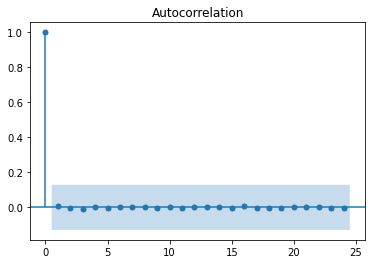

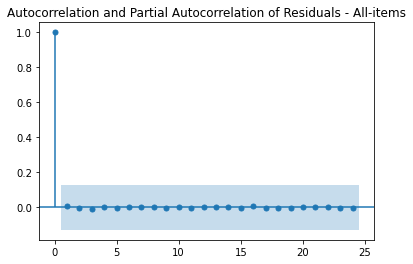

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


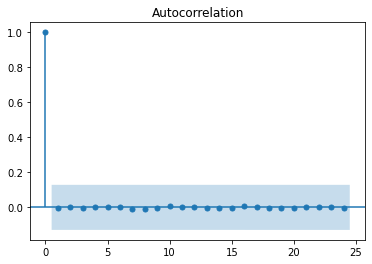

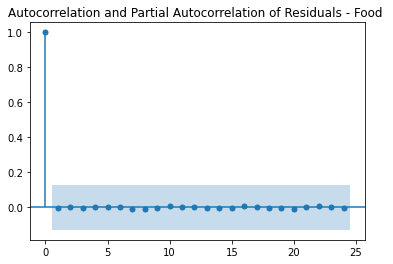

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


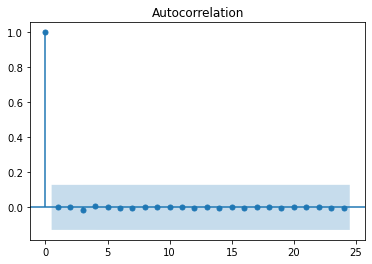

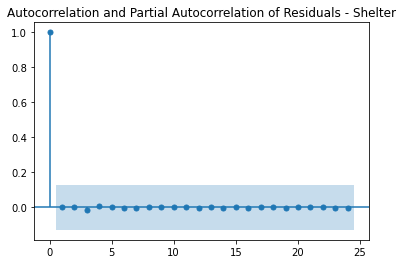

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-package

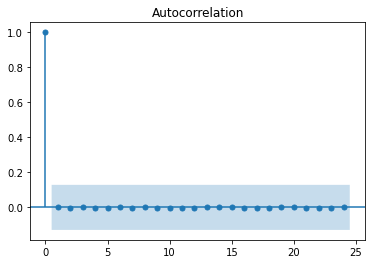

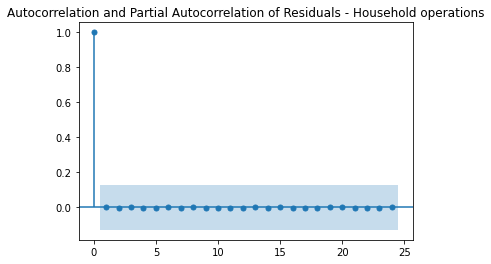

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


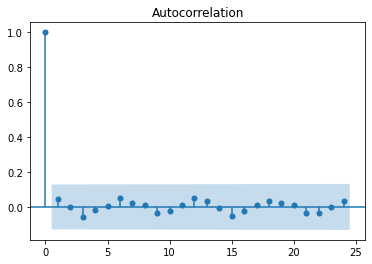

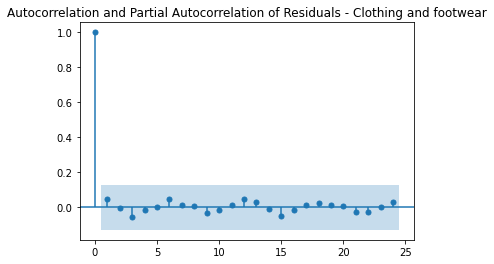

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


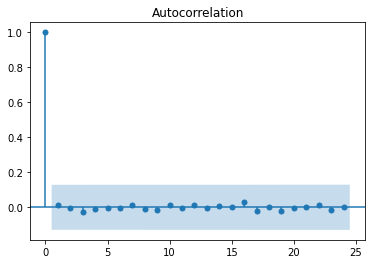

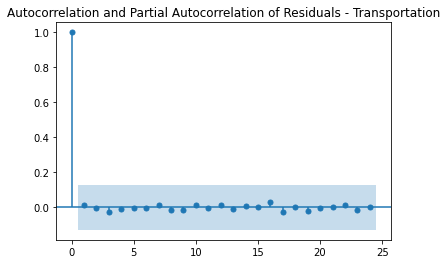

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


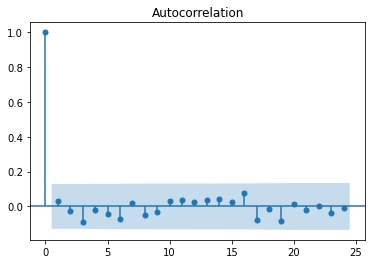

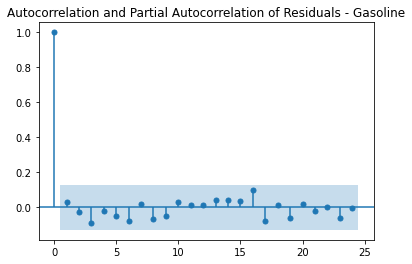

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


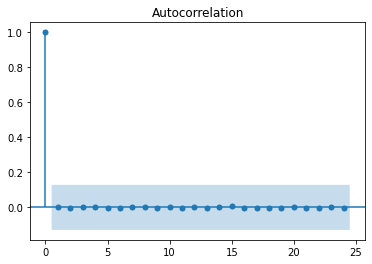

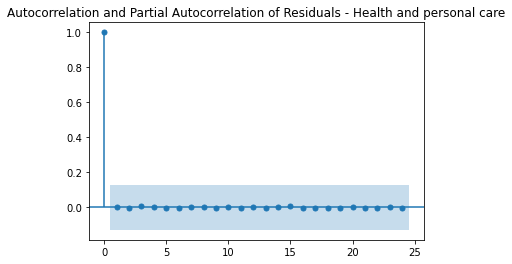

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


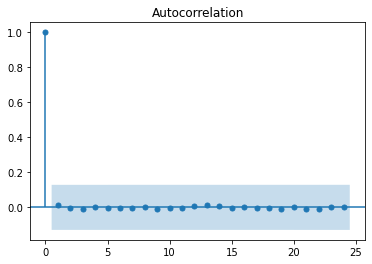

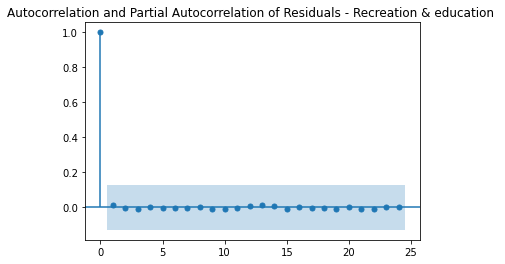

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-package

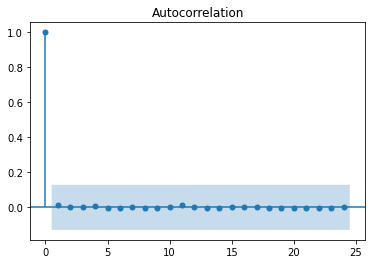

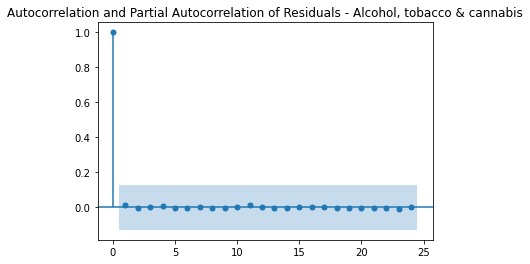

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


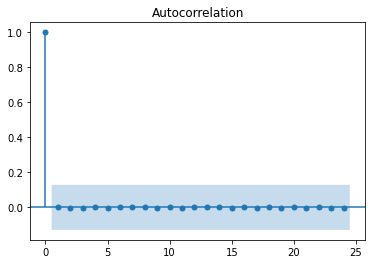

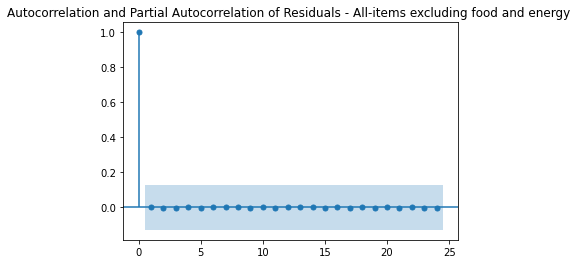

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


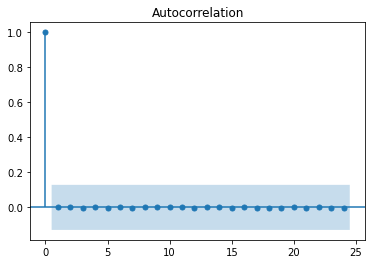

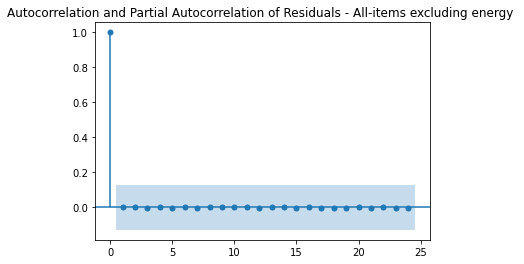

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


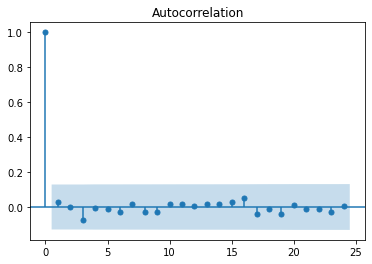

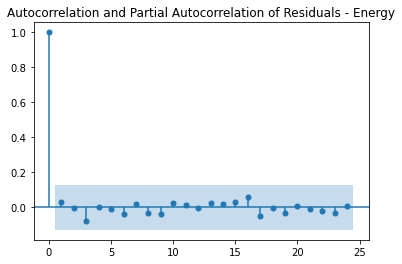

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


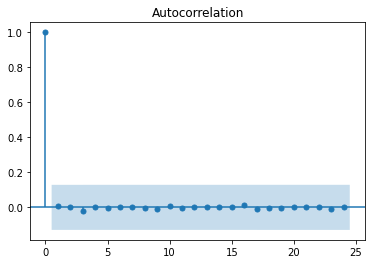

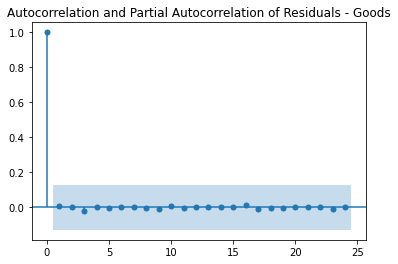

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


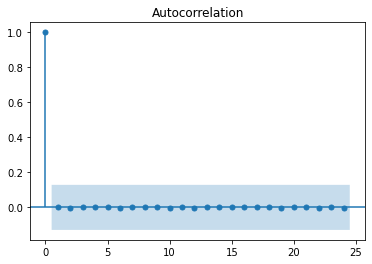

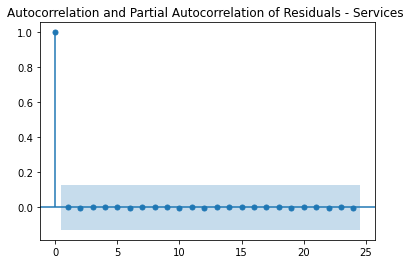

In [44]:
for component in cpi_components:
    # Fit the ARIMA model
    arima_model = ARIMA(train_data[component], order=order)
    arima_model_fit = arima_model.fit()

    # Check model residuals
    residuals = arima_model_fit.resid
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Forecasting
    forecast = arima_model_fit.forecast(steps=len(test_data))[0]

    forecast_results[component] = forecast

# Step 4: Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

In [45]:
# Evaluate model performance
arima_mae = mean_absolute_error(test_data.values, forecast_df.values)
arima_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))
arima_r2 = r2_score(test_data.values, forecast_df.values)

def smape(y_true, y_pred):
    return 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_score = smape(test_data.values, forecast_df.values)

print('MAE :',arima_mae)
print('SMAPE : ',smape_score)
print('RMSE :', arima_rmse)
print('R2 Score:', arima_r2)



MAE : 5.566843374014861
SMAPE :  3.1203909872363136
RMSE : 9.137195081423767
R2 Score: -4.164924191853658


### Lasso Regressor 

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-24]  # Use all but the last 12 months for training
test_data = data.iloc[-24:]

# Create a list to hold Lasso regressors
lasso_regressors = []

# Fit Lasso regressors for each component
for component in cpi_components:
    # Prepare the training data for the current component
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values
    
    lasso_model = Lasso(alpha=0.1)  # Adjust alpha value as per your needs
    lasso_model.fit(X_train, y_train)
    lasso_regressors.append((component, lasso_model))

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=lasso_regressors, final_estimator=Lasso())

# Prepare the testing data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

# Create DataFrame to hold the forecast results
forecast_results = pd.DataFrame(index=test_data.index)

# Predict for each component
for component, lasso_model in lasso_regressors:
    # Prepare the testing data for the current component
    X_test_component = X_test
    
    # Forecasting for the current component
    forecast = lasso_model.predict(X_test_component)
    
    # Store the forecast in the DataFrame
    forecast_results[component] = forecast

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the stacking regressor
stacking_regressor.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = stacking_regressor.predict(X_test_scaled)

# Evaluate model performance
lasso_mae = mean_absolute_error(test_data.values, forecast_results.values)
lasso_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_results.values))
lasso_r2 = r2_score(test_data.values, forecast_results.values)



# SMAPE calculation
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(test_data.values, forecast_results.values)
print('MAE:', lasso_mae)
print('SMAPE:', smape_score)
print('RMSE:', lasso_rmse)
print('R2 Score:', lasso_r2)




MAE: 11.370378111994548
SMAPE: 6.8155963793370935
RMSE: 18.827217762339306
R2 Score: -2.0301704024912426


### Support Vector Regressor 

In [95]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-24]  # Use all but the last 12 months for training
test_data = data.iloc[-24:]

# Fit SVR models for each component
svr_models = {}  # Dictionary to store the SVR models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component

for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the SVR model
    svr_model = SVR()
    svr_model.fit(X_train, y_train)

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = svr_model.predict(X_test)

    svr_models[component] = svr_model
    forecast_results[component] = forecast

# Combine forecasts from individual SVR models using averaging
ensemble_forecast = np.mean(list(forecast_results.values()), axis=0)

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(ensemble_forecast, index=test_data.index, columns=[cpi_components[0]])

# Evaluate model performance
ensemble_mae = mean_absolute_error(test_data[cpi_components[0]].values, forecast_df.values)
ensemble_rmse = np.sqrt(mean_squared_error(test_data[cpi_components[0]].values, forecast_df.values))

# Calculate overall R2 score
ensemble_r2 = r2_score(test_data[cpi_components[0]].values, forecast_df.values)

# Calculate SMAPE
def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

ensemble_smape = smape(test_data[cpi_components[0]].values, forecast_df.values)

print(f"Mean Absolute Error (MAE): {ensemble_mae}")
print("SMAPE:", ensemble_smape)
print(f"Root Mean Squared Error (RMSE): {ensemble_rmse}")
print("Overall R2 Score:", ensemble_r2)



Mean Absolute Error (MAE): 14.194272116904061
SMAPE: 238.55718943438126
Root Mean Squared Error (RMSE): 15.37269156757096
Overall R2 Score: -8.168270222224642


### Random Forest Regressor 

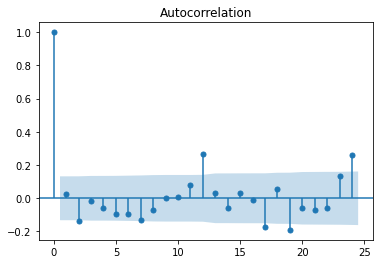

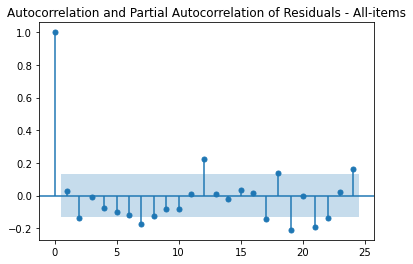

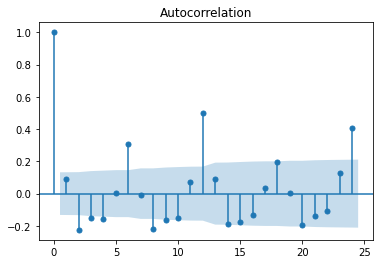

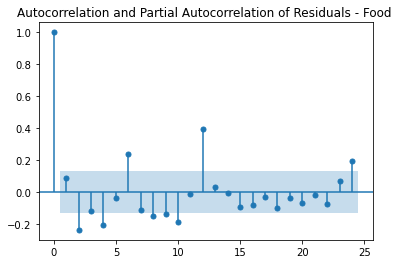

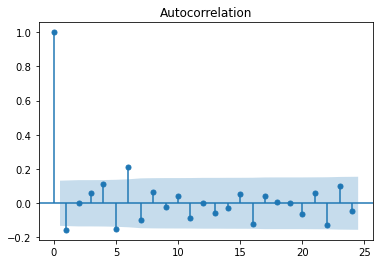

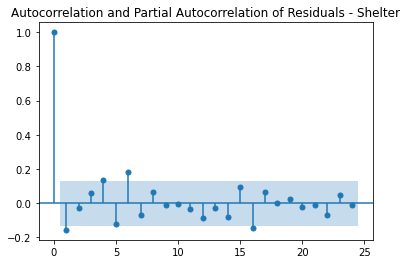

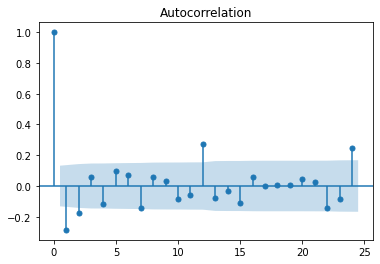

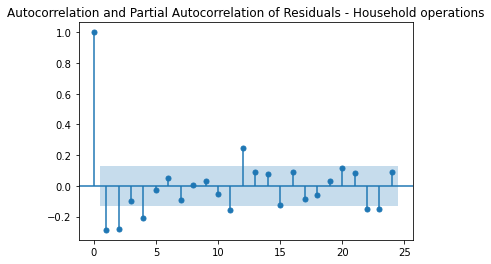

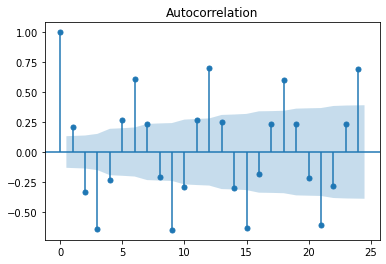

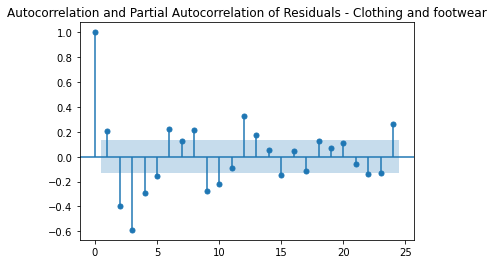

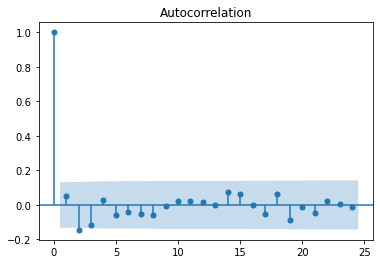

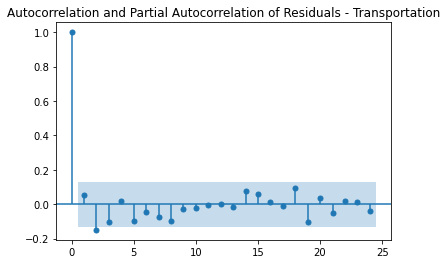

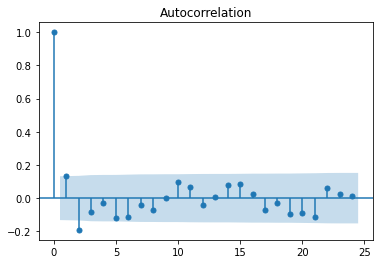

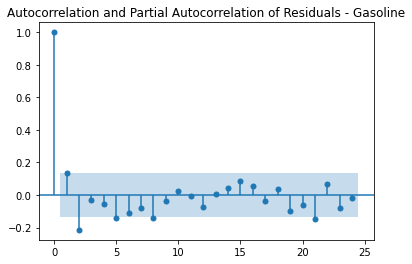

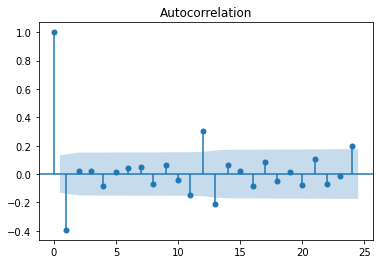

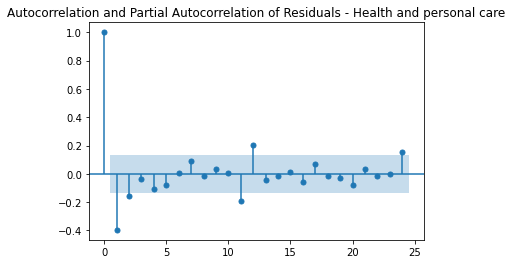

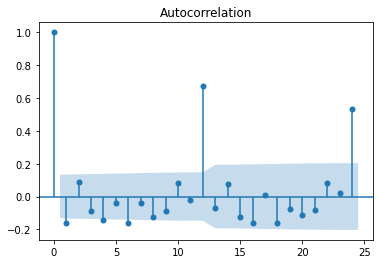

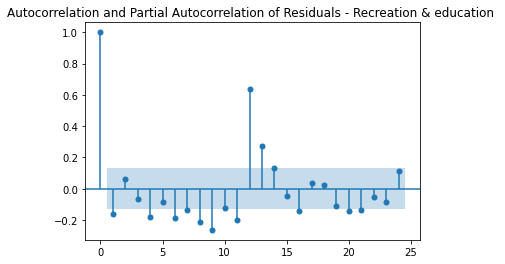

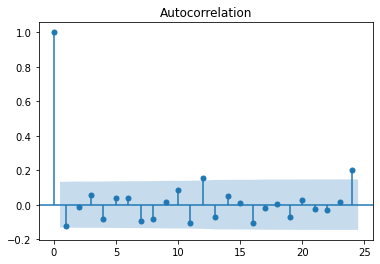

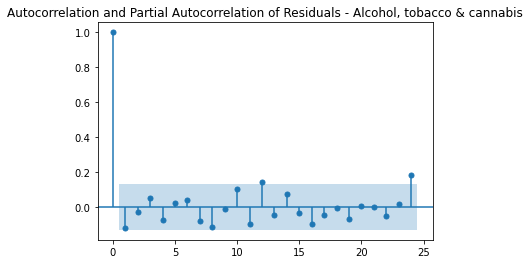

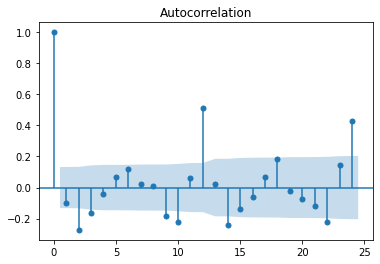

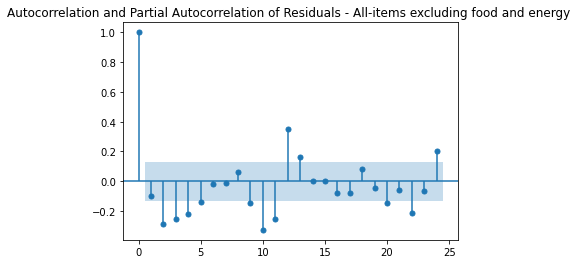

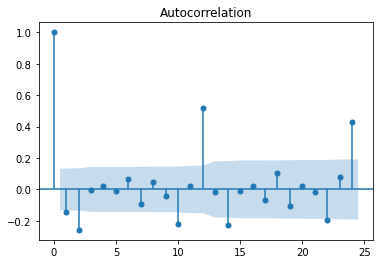

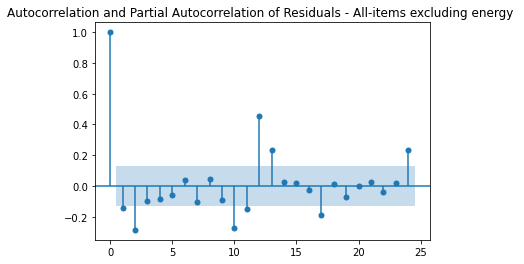

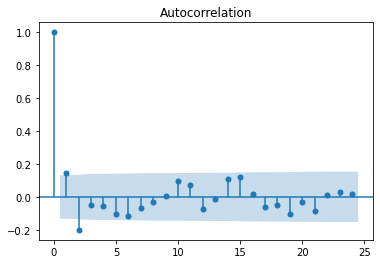

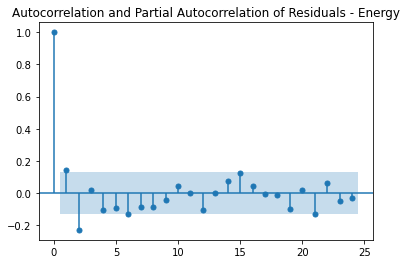

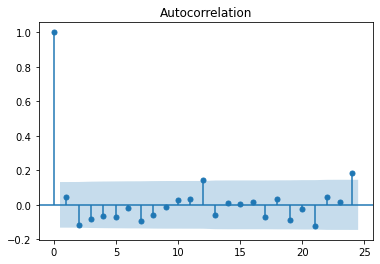

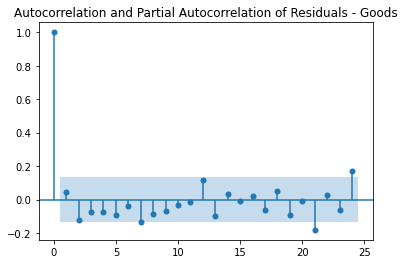

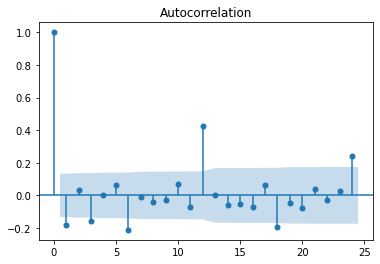

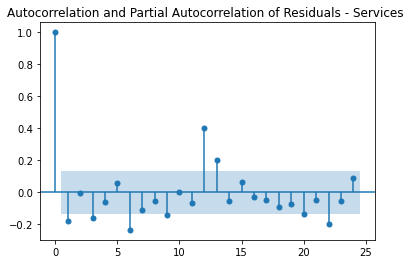

Mean Absolute Error (MAE): 12.081222222222234
Overall SMAPE Score: 7.263244368215867
Root Mean Squared Error (RMSE): 19.18445903560714
Overall R2 Score: -2.71763022179796


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0], index_col=[0])
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)
train_data = data.iloc[:-24]  # Use all but the last 12 months for training
test_data = data.iloc[-24:]

# Step 3: Fit Random Forest Regressor models for each component
rf_models = {}  # Dictionary to store the Random Forest models for each component
forecast_results = {}  # Dictionary to store the forecast results for each component

smape_scores = []  # List to store SMAPE scores for each component

for component in cpi_components:
    # Prepare the training data
    X_train = np.arange(len(train_data)).reshape(-1, 1)
    y_train = train_data[component].values

    # Fit the Random Forest Regressor model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Check model residuals
    train_predictions = rf_model.predict(X_train)
    residuals = y_train - train_predictions
    plot_acf(residuals)
    plot_pacf(residuals)
    plt.title(f'Autocorrelation and Partial Autocorrelation of Residuals - {component}')
    plt.show()

    # Prepare the testing data
    X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)

    # Forecasting
    forecast = rf_model.predict(X_test)

    rf_models[component] = rf_model
    forecast_results[component] = forecast

    # Calculate SMAPE score
    smape = np.mean(2 * np.abs(forecast - test_data[component].values) / (np.abs(forecast) + np.abs(test_data[component].values))) * 100
    smape_scores.append(smape)

# Create DataFrame of forecast results
forecast_df = pd.DataFrame(forecast_results, index=test_data.index)

# Calculate overall R2 score
rf_r2 = r2_score(test_data.values, forecast_df.values)

# Calculate overall SMAPE score
rf_smape = np.mean(smape_scores)

# Step 5: Evaluate model performance
rf_mae = mean_absolute_error(test_data.values, forecast_df.values)
rf_rmse = np.sqrt(mean_squared_error(test_data.values, forecast_df.values))

print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"Overall SMAPE Score: {rf_smape}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Overall R2 Score: {rf_r2}")



## Artificial Neural Network

In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Normalize the target data
scaler = MinMaxScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_data_scaled, test_size=0.2, shuffle=False)

# Build the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(120, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(len(target_columns))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=8)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Perform predictions
predictions = model.predict(X_test)

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)

# Calculate evaluation metrics
mae = mean_absolute_error(target_data.loc[X_test.index], predictions_denormalized)
rmse = np.sqrt(mean_squared_error(target_data.loc[X_test.index], predictions_denormalized))

smape_values = np.mean(np.abs(target_data.loc[X_test.index] - predictions_denormalized) / 
                       (np.abs(target_data.loc[X_test.index]) + np.abs(predictions_denormalized))) * 200
smape_average = np.mean(smape_values)

r2 = r2_score(target_data.loc[X_test.index], predictions_denormalized)

print("Evaluation metrics:")
print("MAE:", mae)
print("SMAPE Average:", smape_average)
print("RMSE:", rmse)
print("R2 Score:", r2)


Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 10274.8164
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 317.3522
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 27.9076
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 3.7921
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1.0573
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6711
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 6.1567
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 2.0995
Epoch 13/500
25/25 [==========

25/25 [==============================] - 0s 1ms/step - loss: 1.0235
Epoch 103/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6775
Epoch 104/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 107/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0403
Epoch 108/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 109/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 110/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 111/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 112/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 113/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 114/500
25/25 [=========

25/25 [==============================] - 0s 1ms/step - loss: 0.2570
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1172
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 303/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 304/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 305/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 307/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 308/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 309/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 310/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1768
Epoch 311/500
25/25 [==============================] - 0s 1ms/step - loss: 0.2298
Epoch 312/500
25/25 [=========

Epoch 400/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 401/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 402/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1161
Epoch 404/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1953
Epoch 405/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1106
Epoch 406/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0825
Epoch 407/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0270
Epoch 408/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 409/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 410/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 411/500
25/25 [==============================] - 0s 1ms/step - loss: 0.1013
Epoch 412/500
25

## LSTM

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Normalize the target data
scaler = StandardScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_data_scaled, test_size=0.1, shuffle=False)

# Reshape the input data for LSTM
X_train = np.array(X_train).reshape(-1, 1, 1)
X_test = np.array(X_test).reshape(-1, 1, 1)

# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(120, activation='softmax', input_shape=(1, 1)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(len(target_columns))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Perform predictions
predictions = model.predict(X_test)

# Reshape the predictions for denormalization
predictions = predictions.reshape(-1, len(target_columns))

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions_denormalized)
rmse = np.sqrt(mean_squared_error(y_test, predictions_denormalized))

smape_values = np.mean(np.abs(y_test - predictions_denormalized) /
                       (np.abs(y_test) + np.abs(predictions_denormalized))) * 200
smape_average = np.mean(smape_values)

r2 = r2_score(y_test, predictions_denormalized)

print("Evaluation metrics:")
print("MAE:", mae)
print("SMAPE Average:", smape_average)
print("RMSE:", rmse)
print("R2 Score:", r2)


Epoch 1/300
98/98 [==============================] - 1s 2ms/step - loss: 0.6166
Epoch 2/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5603
Epoch 3/300
98/98 [==============================] - 0s 2ms/step - loss: 0.5568
Epoch 4/300
98/98 [==============================] - 0s 2ms/step - loss: 0.5590
Epoch 5/300
98/98 [==============================] - 0s 2ms/step - loss: 0.5583
Epoch 6/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5584
Epoch 7/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5590
Epoch 8/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5582
Epoch 9/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5619
Epoch 10/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5579
Epoch 11/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5576
Epoch 12/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5599
Epoch 13/300
98/98 [=================

98/98 [==============================] - 0s 1ms/step - loss: 0.5554
Epoch 203/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5554
Epoch 204/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5557
Epoch 205/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5554
Epoch 206/300
98/98 [==============================] - 0s 2ms/step - loss: 0.5571
Epoch 207/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5554
Epoch 208/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5545
Epoch 209/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5555
Epoch 210/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5550
Epoch 211/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5562
Epoch 212/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5556
Epoch 213/300
98/98 [==============================] - 0s 1ms/step - loss: 0.5560
Epoch 214/300
98/98 [=========

## Convolutional LSTM

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Normalize the target data
scaler = StandardScaler()
target_data_scaled = scaler.fit_transform(target_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_data_scaled, test_size=0.3, shuffle=True)

# Reshape the input data for ConvLSTM
X_train = np.array(X_train).reshape(-1, 1, 1, 1)
X_test = np.array(X_test).reshape(-1, 1, 1, 1)

# Build the ConvLSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.ConvLSTM2D(180, kernel_size=(1, 1), activation='sigmoid', input_shape=(1, 1, 1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(len(target_columns))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=4)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Perform predictions
predictions = model.predict(X_test)

# Reshape the predictions for denormalization
predictions = predictions.reshape(-1, len(target_columns))

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions_denormalized)
rmse = np.sqrt(mean_squared_error(y_test, predictions_denormalized))

smape_values = np.mean(np.abs(y_test - predictions_denormalized) /
                       (np.abs(y_test) + np.abs(predictions_denormalized))) * 200
smape_average = np.mean(smape_values)

r2 = r2_score(y_test, predictions_denormalized)

print("Evaluation metrics:")
print("MAE:", mae)
print("SMAPE Average:", smape_average)
print("RMSE:", rmse)
print("R2 Score:", r2)

Epoch 1/300
43/43 [==============================] - 2s 4ms/step - loss: 0.9217
Epoch 2/300
43/43 [==============================] - 0s 3ms/step - loss: 0.9027
Epoch 3/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8758
Epoch 4/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8867
Epoch 5/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8891
Epoch 6/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8808
Epoch 7/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8841
Epoch 8/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8937
Epoch 9/300
43/43 [==============================] - 0s 3ms/step - loss: 0.9235
Epoch 10/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8976
Epoch 11/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8947
Epoch 12/300
43/43 [==============================] - 0s 3ms/step - loss: 0.8978
Epoch 13/300
43/43 [=================

43/43 [==============================] - 0s 4ms/step - loss: 0.8935
Epoch 203/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8934
Epoch 204/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8936
Epoch 205/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8936
Epoch 206/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8937
Epoch 207/300
43/43 [==============================] - 0s 5ms/step - loss: 0.8935
Epoch 208/300
43/43 [==============================] - 0s 5ms/step - loss: 0.8935
Epoch 209/300
43/43 [==============================] - 0s 5ms/step - loss: 0.8936
Epoch 210/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8937
Epoch 211/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8938
Epoch 212/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8935
Epoch 213/300
43/43 [==============================] - 0s 4ms/step - loss: 0.8934
Epoch 214/300
43/43 [=========